1) Follow these steps to use this notebook:

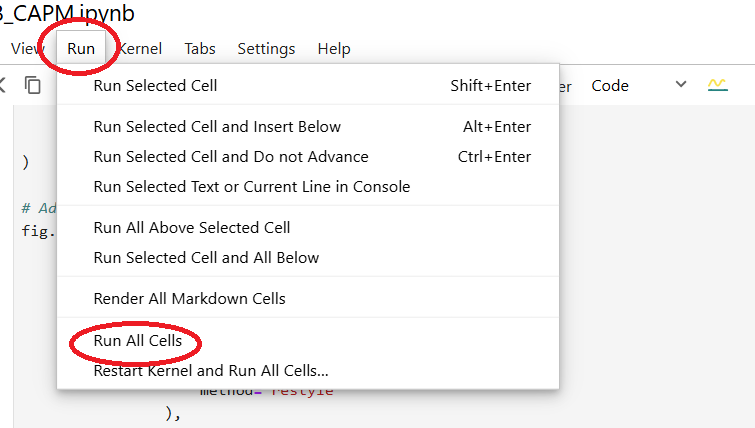

2) Collapse all code:


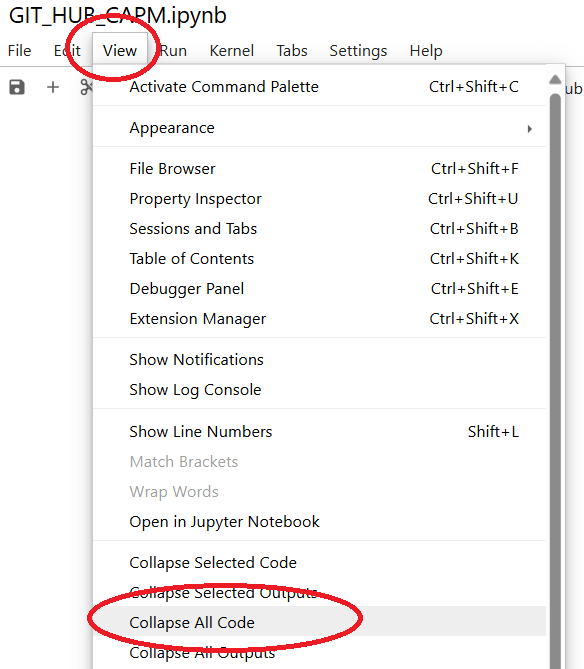



##THE CODE FOR THIS WORKBOOK WAS CREATED WITH THE ASSISTANCE OF MICROSOFT COPILOT AND CHAT GPT 3.5 AND ADAPTED TO EXPLAIN THIS PARTICULAR DATASET.

##Date:
Unemployment Rate:
Interest Rates: (Especially mortgage rates)
GDP Growth:
Consumer Price Index (Inflation):

The Federal Reserve was challenged through 2008 with an imbalance of the worldwide money supply.  Third world countries were saving and spending very little.  On the other hand, the U.S. was spending and had a large supply of dollars because of a deficit between Third World Saving and U.S. Spending.  The Federal reserve was tasked with trying to keep interest rates down to avoid hampering the labor market while at the same time having to offset inflation.  

Dunaway, Steven, "Global Imbalances and the Financial Crisis", Council Foreign Relations, March 2009, www.cfr.org

Some interest rates being charged on Mortgage Loans were a fraction above the LIBOR.  Additionally, to make these loans more affordable some were made as interest only loans.  Interest only loans are meant for certain types of borrowers which do not include household mortgages.  For example, if a builder has a project for a residential neighborhood they would be interested in a interest only loan since the intent would be to keep the loan for as short of a duration as possible.  

**CPI can be used to guage inflation

**The unemployment rate is an indicator of the labor market

**Gross Domestic Product (GDP) is a measurement of the overall productivity of a country.

**Mortgage Rates - correlated to other interest rates such as the Federal Funds Rate

UNEMPLOYMENT RATE can be found through the BUREAU OF LABOR AND STATISTICS www.bls.gov
CONSUMER PRICE INDEX  can be found through the BUREAU OF LABOR AND STATISTICS www.bls.gov
GROSS DOMESTIC PRODUCT can be found through the BUREAU OF ECONOMIC ANALYSIS www.bea.gov
DEFAULT RATES can be found through the FEDERAL RESERVE BANK www.federalreserve.gov
MORTGAGE RATES can be found through FREDDIE MAC www.freddiemac.com

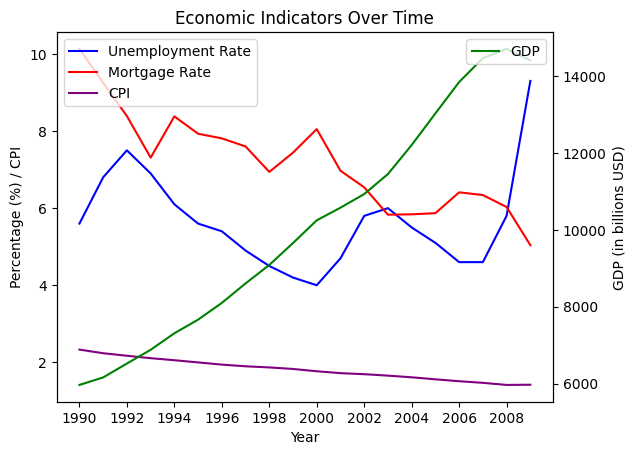

                    Year  Unemployment  Mortgage_Rates       GDP       CPI  \
Year            1.000000     -0.080765       -0.902614  0.993401 -0.995425   
Unemployment   -0.080765      1.000000       -0.085439 -0.096234  0.128140   
Mortgage_Rates -0.902614     -0.085439        1.000000 -0.867851  0.908911   
GDP             0.993401     -0.096234       -0.867851  1.000000 -0.984329   
CPI            -0.995425      0.128140        0.908911 -0.984329  1.000000   
Default         0.479617      0.623519       -0.446906  0.485586 -0.426597   

                 Default  
Year            0.479617  
Unemployment    0.623519  
Mortgage_Rates -0.446906  
GDP             0.485586  
CPI            -0.426597  
Default         1.000000  


In [ ]:
!pip install cpi
import pandas as pd
import matplotlib.pyplot as plt
import cpi
!pip install requests
import requests
!pip install openpyxl


# Assuming your file is in "Meltdown_Data.xlsx"
url = 'https://raw.githubusercontent.com/jeradmelgard/Supporting_Docs/main/Meltdown_Data.xlsx'
response = requests.get(url)

with open('document.xlsx', 'wb') as file:
    file.write(response.content) # Update with your file path

# Assign 'document.xlsx' to the file_path variable
file_path = 'document.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Year' column to datetime objects
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Add CPI data to the DataFrame
df['CPI'] = df['Year'].apply(lambda x: cpi.inflate(1, x.year))

# Create a figure and axes
fig, ax1 = plt.subplots()

# Plot Average Unemployment Rate, Average Mortgage Rate, and CPI on the same axis
ax1.plot(df['Year'], df['Unemployment'], label='Unemployment Rate', color='blue')
ax1.plot(df['Year'], df['Mortgage_Rates'], label='Mortgage Rate', color='red')
ax1.plot(df['Year'], df['CPI'], label='CPI', color='purple')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage (%) / CPI')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Create a second y-axis for GDP
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['GDP'], label='GDP', color='green')
ax2.set_ylabel('GDP (in billions USD)')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Set the title
plt.title('Economic Indicators Over Time')

# Show the plot
plt.show()

# Calculate the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Further analysis and visualization can be done based on these initial explorations.

# Further analysis and visualization can be done based on these initial explorations.

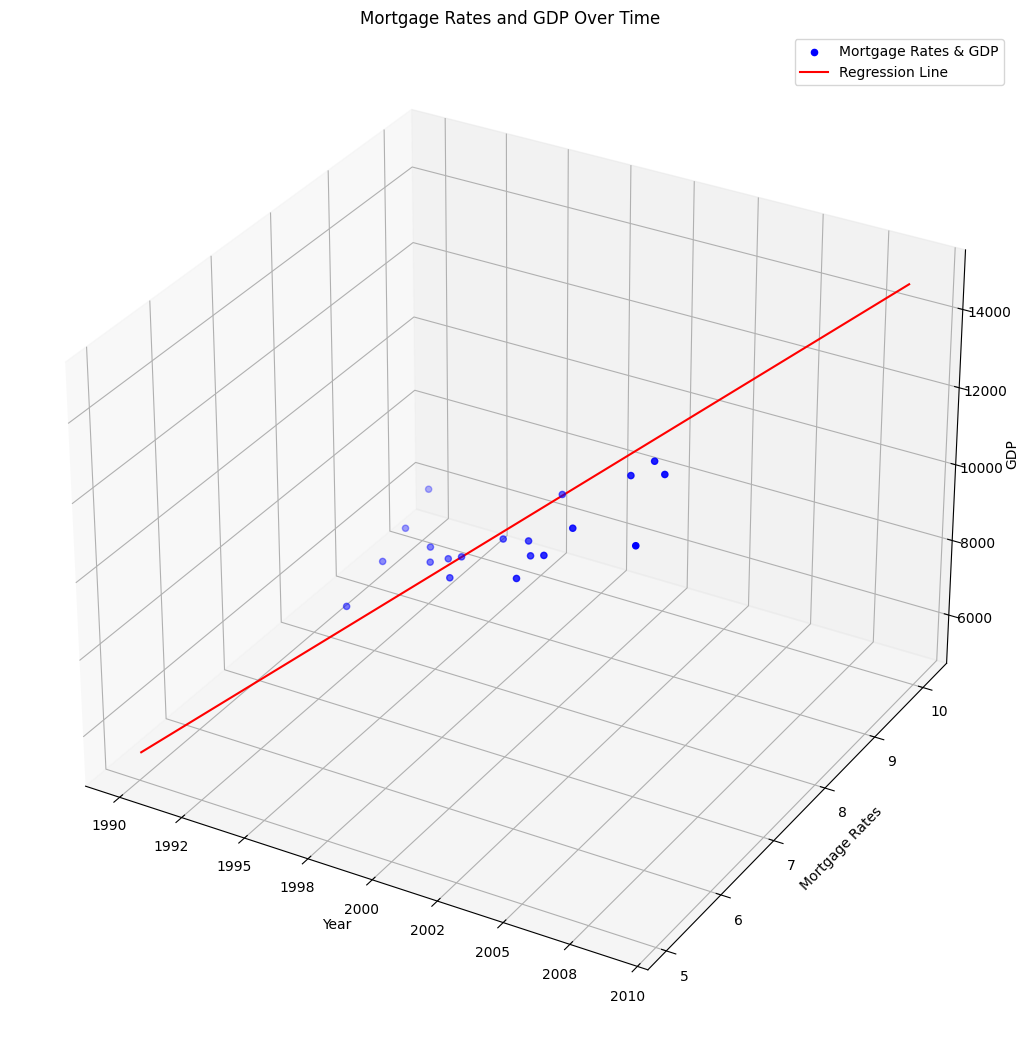

In [ ]:
!pip install cpi
import pandas as pd
import matplotlib.pyplot as plt
import cpi
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.ticker import FormatStrFormatter
!pip install requests
import requests

# Load the dataset
# Assuming your file is in "Meltdown_Data.xlsx"
url = 'https://raw.githubusercontent.com/jeradmelgard/Supporting_Docs/main/Meltdown_Data.xlsx'
response = requests.get(url)
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Year' column to datetime objects and extract year as integer
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year

# Add CPI data to the DataFrame (optional - not used in this plot)
df['CPI'] = df['Year'].apply(lambda x: cpi.inflate(1, x))

# Create a figure and axes
fig = plt.figure(figsize=(15, 13))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Mortgage Rates and GDP
ax.scatter(df['Year'], df['Mortgage_Rates'], df['GDP'], c='blue', label='Mortgage Rates & GDP')

# Linear Regression
X = df[['Year', 'Mortgage_Rates']].values.reshape(-1, 2)
Y = df['GDP']
reg = np.poly1d(np.polyfit(X[:,0], Y, 1))

# Create the regression line
x_range = np.linspace(df['Year'].min(), df['Year'].max(), 100)
y_range = np.linspace(df['Mortgage_Rates'].min(), df['Mortgage_Rates'].max(), 100)
X_reg = np.array([x_range, y_range])
Z_reg = reg(x_range)
ax.plot(x_range, y_range, Z_reg, c='red', label='Regression Line')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mortgage Rates')
ax.set_zlabel('GDP', rotation=90) # Make GDP label horizontal
plt.title('Mortgage Rates and GDP Over Time')

# Format year ticks to show as whole numbers
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Add a legend
ax.legend()

# Show the plot
plt.show()

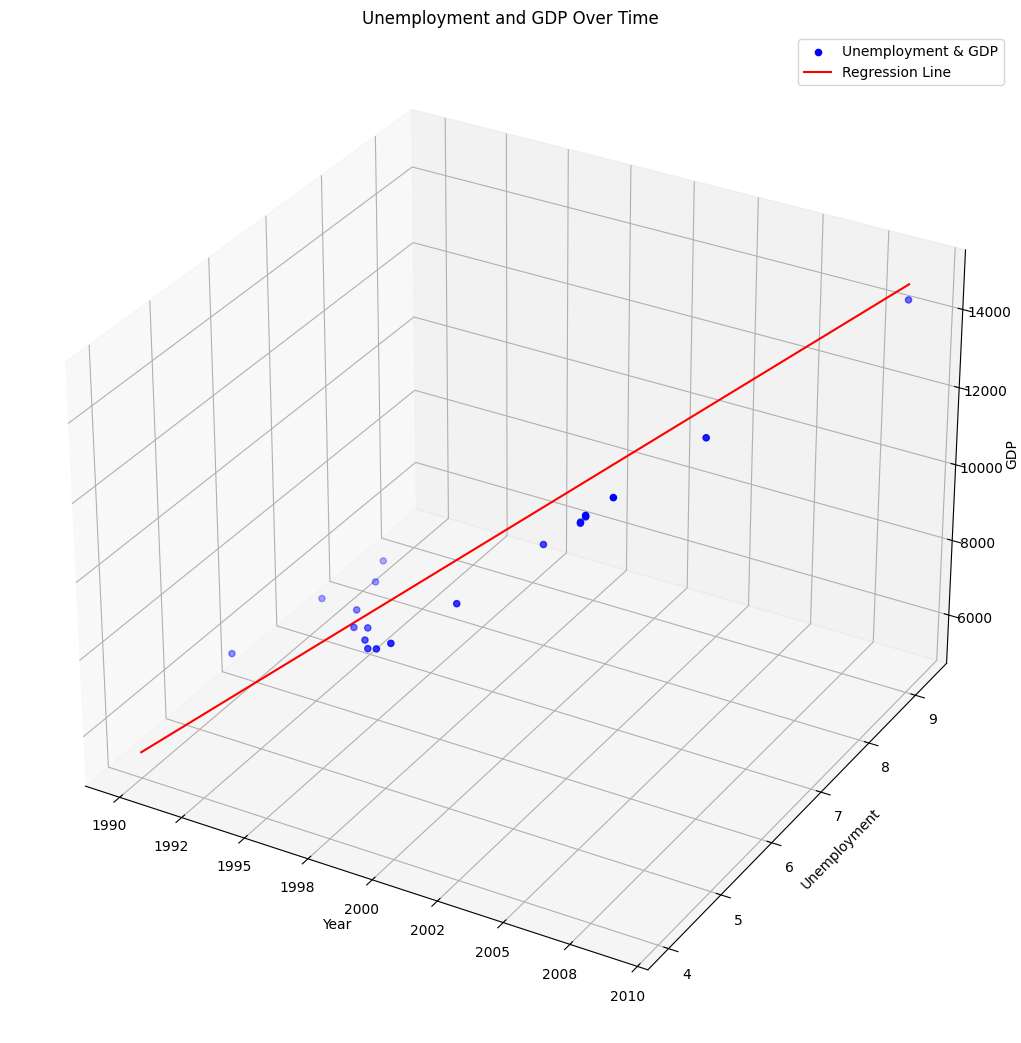

In [ ]:
!pip install cpi
import pandas as pd
import matplotlib.pyplot as plt
import cpi
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.ticker import FormatStrFormatter
!pip install requests
import requests

# Load the dataset
# Load the dataset
# Assuming your file is in "Meltdown_Data.xlsx"
url = 'https://raw.githubusercontent.com/jeradmelgard/Supporting_Docs/main/Meltdown_Data.xlsx'
response = requests.get(url)
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Year' column to datetime objects and extract year as integer
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year

# Add CPI data to the DataFrame (optional - not used in this plot)
df['CPI'] = df['Year'].apply(lambda x: cpi.inflate(1, x))

# Create a figure and axes
fig = plt.figure(figsize=(15, 13))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Unemployment and GDP
ax.scatter(df['Year'], df['Unemployment'], df['GDP'], c='blue', label='Unemployment & GDP')

# Linear Regression
X = df[['Year', 'Unemployment']].values.reshape(-1, 2)
Y = df['GDP']
reg = np.poly1d(np.polyfit(X[:,0], Y, 1))

# Create the regression line
x_range = np.linspace(df['Year'].min(), df['Year'].max(), 100)
y_range = np.linspace(df['Unemployment'].min(), df['Unemployment'].max(), 100)
X_reg = np.array([x_range, y_range])
Z_reg = reg(x_range)
ax.plot(x_range, y_range, Z_reg, c='red', label='Regression Line')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment')
ax.set_zlabel('GDP', rotation=90) # Make GDP label horizontal
plt.title('Unemployment and GDP Over Time')

# Format year ticks to show as whole numbers
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Add a legend
ax.legend()

# Show the plot
plt.show()

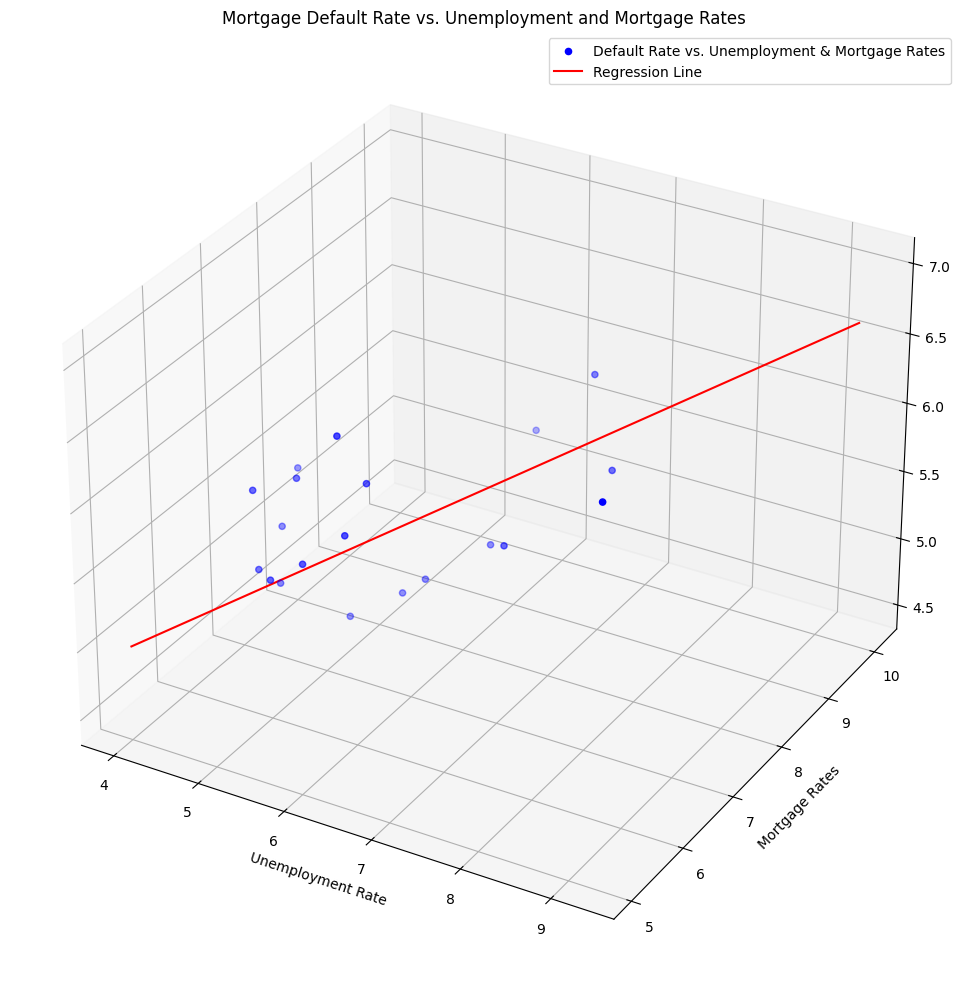

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.ticker import FormatStrFormatter
!pip install requests
import requests

# Load the dataset
# Load the dataset
# Assuming your file is in "Meltdown_Data.xlsx"
url = 'https://raw.githubusercontent.com/jeradmelgard/Supporting_Docs/main/Meltdown_Data.xlsx'
response = requests.get(url)
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Year' column to datetime objects and extract year as integer
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year

# Create a figure and axes
fig = plt.figure(figsize=(12, 10))  # Increased figure size
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Default, Unemployment, and Mortgage Rates
ax.scatter(df['Unemployment'], df['Mortgage_Rates'],
           df['Default'], c='blue',
           label='Default Rate vs. Unemployment & Mortgage Rates')

# Linear Regression
X = df[['Unemployment', 'Mortgage_Rates']].values.reshape(-1, 2)
Y = df['Default']
reg = np.poly1d(np.polyfit(X[:, 0], Y, 1))

# Create the regression line
x_range = np.linspace(df['Unemployment'].min(), df['Unemployment'].max(), 100)
y_range = np.linspace(df['Mortgage_Rates'].min(),
                     df['Mortgage_Rates'].max(), 100)
X_reg = np.array([x_range, y_range])
Z_reg = reg(x_range)
ax.plot(x_range, y_range, Z_reg, c='red', label='Regression Line')

# Set labels and title
ax.set_xlabel('Unemployment Rate')
ax.set_ylabel('Mortgage Rates')
ax.set_zlabel('Default Rate', rotation=90, labelpad=20)  # Added labelpad
plt.title('Mortgage Default Rate vs. Unemployment and Mortgage Rates')

# Add a legend
ax.legend()

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Show the plot
plt.show()

##The below heatmap illustrates the correlation of different variables to these intertwined economic factors.  The closer in color each factor is to another the more closely related they are.

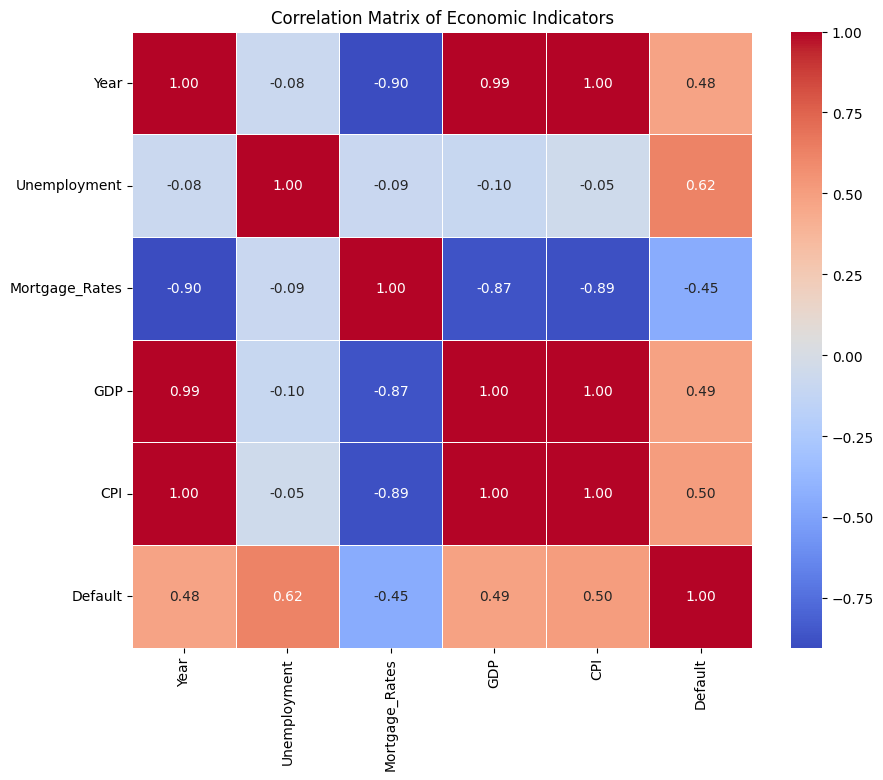

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install requests
import requests

# Load the dataset
# Assuming your file is in "Meltdown_Data.xlsx"
url = 'https://raw.githubusercontent.com/jeradmelgard/Supporting_Docs/main/Meltdown_Data.xlsx'
response = requests.get(url)
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Year' column to datetime objects and extract year
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Economic Indicators')
plt.show()

In [ ]:
!pip install plotly
import plotly.express as px
import pandas as pd
!pip install requests
import requests
!pip install statsmodels


# Load the dataset
# Load the dataset
# Assuming your file is in "Meltdown_Data.xlsx"
url = 'https://raw.githubusercontent.com/jeradmelgard/Supporting_Docs/main/Meltdown_Data.xlsx'
response = requests.get(url)  # Update with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Year' column to datetime objects and extract year
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year

# Create a list of columns to plot (excluding Year)
columns_to_plot = df.columns.tolist()[1:]

# Create scatter plots for each variable
for column in columns_to_plot:
    fig = px.scatter(df,
                     x='Year',
                     y=column,
                     title=f'{column} Over Time',
                     trendline="ols")  # Add a trendline
    fig.show()